<a href="https://colab.research.google.com/github/Sriyansh-36-AI-NITJ/Machine-Learning-Lab/blob/main/Gradient_Descent_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate some sample data for linear regression
np.random.seed(0)
X = 2 * np.random.rand(100, 1) # 100 data points, 1 feature
y = 4 + 3 * X + np.random.randn(100, 1) # y = 4 + 3X + noise

# Add a bias (intercept) term to X
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance

print("Shape of X_b:", X_b.shape)
print("First 5 rows of X_b:\n", X_b[:5])
print("Shape of y:", y.shape)
print("First 5 rows of y:\n", y[:5])

Shape of X_b: (100, 2)
First 5 rows of X_b:
 [[1.         1.09762701]
 [1.         1.43037873]
 [1.         1.20552675]
 [1.         1.08976637]
 [1.         0.8473096 ]]
Shape of y: (100, 1)
First 5 rows of y:
 [[6.12773118]
 [9.19196269]
 [8.0822427 ]
 [5.73305541]
 [8.03018099]]


In [2]:
def cost_function(X_b, y, theta):
    m = len(y)
    predictions = X_b.dot(theta)
    sq_error = (predictions - y)**2
    return 1/(2*m) * np.sum(sq_error)

def gradient(X_b, y, theta):
    m = len(y)
    predictions = X_b.dot(theta)
    grad = (1/m) * X_b.T.dot(predictions - y)
    return grad

# Initialize theta randomly or with zeros
theta_initial = np.random.randn(2, 1) # Two parameters: theta0 (intercept) and theta1 (slope)
print("Initial Theta:\n", theta_initial)
print("Initial Cost:", cost_function(X_b, y, theta_initial))

Initial Theta:
 [[-0.35399391]
 [-1.37495129]]
Initial Cost: 41.3315290049093


In [3]:
def gradient_descent(X_b, y, theta, learning_rate, n_iterations):
    m = len(y)
    cost_history = []
    theta_history = []

    for iteration in range(n_iterations):
        gradients = gradient(X_b, y, theta)
        theta = theta - learning_rate * gradients
        cost = cost_function(X_b, y, theta)
        cost_history.append(cost)
        theta_history.append(theta.copy())

    return theta, cost_history, theta_history

# Set hyperparameters
learning_rate = 0.1
n_iterations = 1000

# Run Gradient Descent
theta_optimized, cost_history, theta_history = gradient_descent(X_b, y, theta_initial, learning_rate, n_iterations)

print("Optimized Theta:\n", theta_optimized)
print("Final Cost:", cost_history[-1])

Optimized Theta:
 [[4.22215104]
 [2.96846754]]
Final Cost: 0.4962193243623243


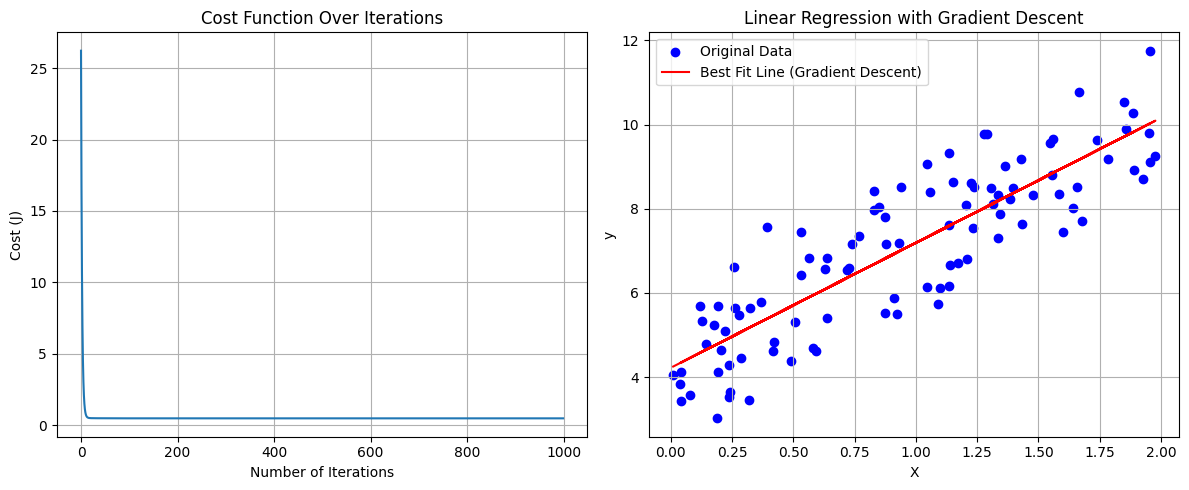

The true parameters were y = 4 + 3X + noise. Gradient Descent found: y = 4.22 + 2.97X


In [4]:
# Plotting the cost history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(n_iterations), cost_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Cost Function Over Iterations')
plt.grid(True)

# Plotting the best-fit line
plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue', label='Original Data')
plt.plot(X, X_b.dot(theta_optimized), color='red', label='Best Fit Line (Gradient Descent)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"The true parameters were y = 4 + 3X + noise. Gradient Descent found: y = {theta_optimized[0,0]:.2f} + {theta_optimized[1,0]:.2f}X")